## Task Name : Prediction using Unsupervised ML

### Task Description : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

##### Author: Debasmita Majumder

###### Import the following libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
%matplotlib inline

### Reading data from csv file

In [17]:
iris= pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking the shape of data

In [18]:
iris.shape

(150, 6)

### Looking for missing values

In [19]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values found

#### Overviewing the data

In [20]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Visualizing the data

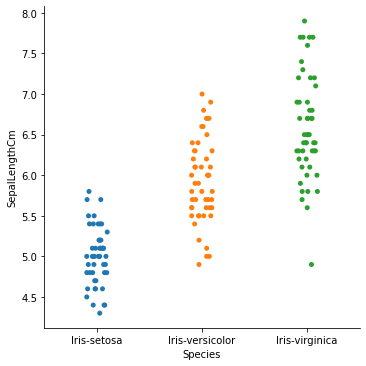

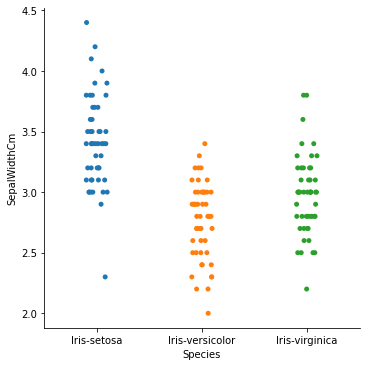

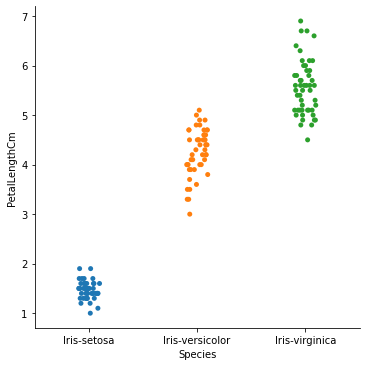

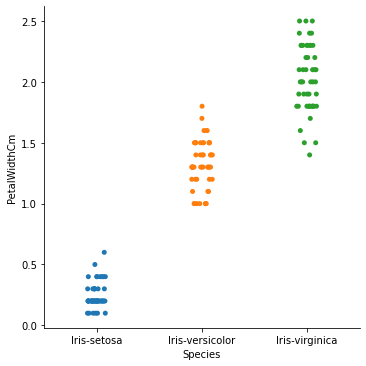

In [21]:
sns.catplot(x='Species', y='SepalLengthCm', data=iris)
sns.catplot(x='Species', y='SepalWidthCm', data=iris)
sns.catplot(x='Species', y='PetalLengthCm', data=iris)
sns.catplot(x='Species', y='PetalWidthCm', data=iris)
plt.show()

### Kmeans clustering

In [22]:
from sklearn.cluster import KMeans
ic = []
for i in range(1,11):
    kmeans = KMeans( n_clusters = i, init='k-means++')
    kmeans.fit(iris.iloc[:,[0,1,2,3]])
    ic.append(kmeans.inertia_)

### Plotting the elbow graph

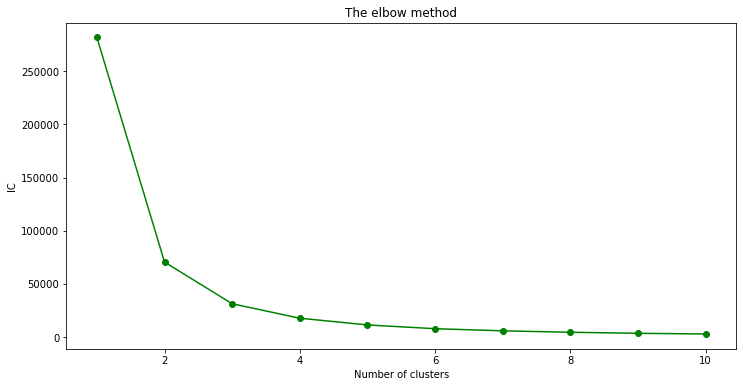

In [23]:
df = pd.DataFrame({'Cluster': range(1,11), 'ic':ic})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'],df['ic'], marker='o',color='green')
plt.xlabel('Number of clusters')
plt.ylabel('IC')#In cluster range
plt.title('The elbow method')
plt.show()

The inference from the "Elbow method" is that the elbow bend is found at 3. Hence, the Optimum number of clusters is 3.

### Applying kmeans to the dataset 

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans= kmeans.fit_predict(iris.iloc[:, [0,1,2,3]].values)

### Plotting the centroids of the clusters on first two columns

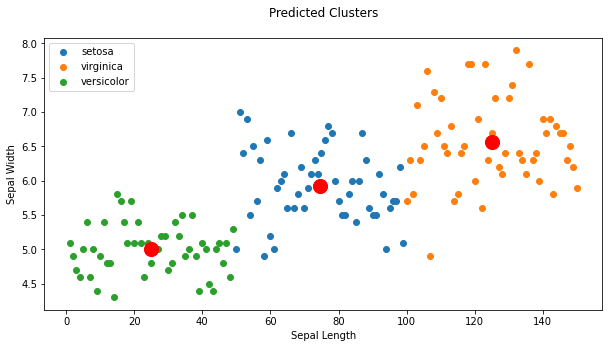

In [28]:
x = iris.iloc[:,[0,1,2,3]].values
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],label='setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],label='virginica')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],label='versicolor')
plt.legend()
plt.title('Predicted Clusters\n')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c='red', label ='Centroids')
plt.show()

### Plotting the centroids of the clusters on next two columns

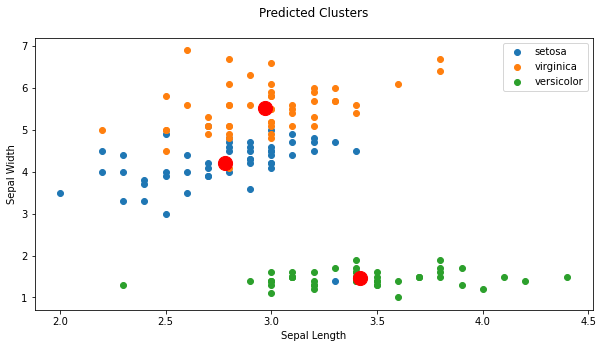

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,3],label='setosa')
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,3],label='virginica')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,3],label='versicolor')
plt.legend()
plt.title('Predicted Clusters\n')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 200, c='red', label ='Centroids')
plt.show()


Hence it can concluded that we can successfully predicted that the optimum no of clusters is 3 and also it can be visible.